<a href="https://colab.research.google.com/github/GGrinspun/ML-Pratica2/blob/main/C%C3%B3pia_de_GABRIEL_SALLES_GRINSPUN_Pr%C3%A1tica_02_k_NN_e_Avalia%C3%A7%C3%A3o_de_Classificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática 02 - k-NN e Avaliação de Classificadores

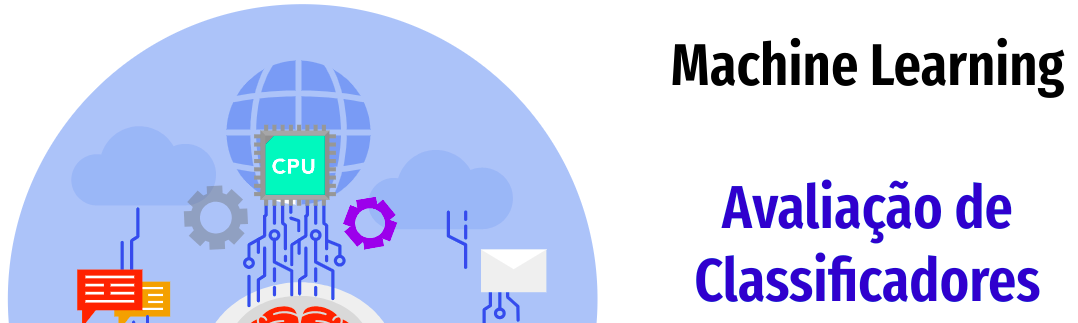


**Pessoa estudante**:  INSIRA SEU NOME AQUI! (gsg@cesar.school)

**Objetivo da Prática**

```
O objetivo desta prática é construir um classificador para predizer as pessoas que sobreviveram, ou não, ao desastre do RMS Titanic. Desta forma vocês devem importar o dataset do Titanic da última prática, considerando as colunas que vocês julgam interessante para construir o modelo de classificação da coluna 'Survived'. É de extrema importância levar em consideração os insights e etapa de pré-processamento realizado na Prática 01.
```

**Instruções para a prática.**


1. Importar o dataset do titanic da forma que você julga interessante para classficar se a pessoa sobreviveu ou não.

2. Realizar as etapas nas correspondentes celulas, contendo instruções/dicas e a respectiva pontuação da prática.

3. **Submeter no Classroom até a data limite. Após o prazo limite, punição de 10 pontos por dia de atraso.**

4. Use o chatGPT com moderação. Ele nao acerta sempre nao viu? 😅



In [ ]:
# Celula de definicao das libraries/dataset
import pandas as pd
import matplotlib.pyplot as plt
# Importe outras libraries que vc ira usar aqui!

# Lembre que o dataset da prática 1 é o do link abaixo
titanic = pd.read_csv('https://raw.githubusercontent.com/GGrinspun/Arquivo_ML_2024/main/titanic_limpo.csv')

Dica: tente importar o .csv da sua prática, talvez você já consiga importar aqui!

## Parte 1 - Importação do Dataset

**Pontuação: 5 pontos**

Considerando o dataset do Titanic da última prática (Prática 01), importe o mesmo com o seu respectivo pré-processamento e indique as colunas que você julga de interesse para o processo de classificação.

In [ ]:
# Dica 1 - Lembrar de importar a coluna 'Survived', afinal é ela que queremos predizer com o classificador! =)

In [ ]:
# Dica 2 - Se você importou os dados com uma técnica de padronização, e não se sentiu feliz com o resultado do classificador/modelo...
# que tal importar o dataset do zero de novo e realizar uma nova etapa de pré-processamento? [você pode fazer isso, apesar do re-trabalho]

In [ ]:
# ATENÇÃO, ASSEGURE QUE VOCÊ ESTÁ IMPORTANDO O MESMO DATASET UTILIZADO NA PRÁTICA PASSADA!
# disponível em https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv

**Vocês provavelmente irão manipular o DataFrame mais de uma vez nesta prática, minha sugestão é que vocês salvem o DataFrame inicial e o chamem atraveś de um função**.

In [ ]:
# esta célula contém código exemplo!

def get_titanic_dataset():
  # Inserir sua lógica
  # Retornar o dataframe original com as colunas

  return titanic

In [ ]:
get_titanic_dataset()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_numerico,Is_Male
0,0,3,22.0,1,0,7.2500,1,1
1,1,1,38.0,1,0,71.2833,2,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,1,1
...,...,...,...,...,...,...,...,...
884,0,2,27.0,0,0,13.0000,1,1
885,1,1,19.0,0,0,30.0000,1,0
886,0,3,17.0,1,2,23.4500,1,0
887,1,1,26.0,0,0,30.0000,2,1


**Caso vocês realizem alguma etapa do pré-processamento de forma distinta, sugiro continuar realizando outras funções para ir retornando esses dataframes para as células seguintes.**

In [ ]:
#transformar a coluna Age para int
def float_to_int(df, column_name):
    # Verifica se a coluna existe no DataFrame
    if column_name not in df.columns:
        print("A coluna especificada não existe no DataFrame.")
        return df

 # Verifica se a coluna contém valores numéricos
    if df[column_name].dtype != 'float64':
        print("A coluna especificada não contém valores float.")
        return df

    # Converte os valores float para int na coluna especificada
    df[column_name] = df[column_name].astype(int)

    return df

#float_to_int(titanic, 'Age')


In [ ]:


def get_df_pipeline1(dfi: titanic):
  # sugiro colocar como entrada o dataset original, executar sua Pipeline
  float_to_int(titanic, 'Age')
  return dfi

get_df_pipeline1(titanic)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_numerico,Is_Male
0,0,3,22,1,0,7.2500,1,1
1,1,1,38,1,0,71.2833,2,0
2,1,3,26,0,0,7.9250,1,0
3,1,1,35,1,0,53.1000,1,0
4,0,3,35,0,0,8.0500,1,1
...,...,...,...,...,...,...,...,...
884,0,2,27,0,0,13.0000,1,1
885,1,1,19,0,0,30.0000,1,0
886,0,3,17,1,2,23.4500,1,0
887,1,1,26,0,0,30.0000,2,1


**Fique a vontade de usar a função [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) do Sklearn também =)**

## Parte 2 - Experimento I - Classificação k-NN

**Pontuação: 35 pontos**

Nesta primeira parte nosso objetivo será criar o melhor classificador possível para predizer o status de 'Survived' das instâncias da base do Titanic. Dessa forma, vocês possuem o desafio de criar um classificador com o k-NN. Note que vocês possuem a missão de definir os parâmetros do classificador (valor de k, métrica de distância utilizada e etc).

Para seguir com este desafio, siga as etapas abaixo:


1.   Divida seu dataset utilizando o Método Holdout com 70%/30% (sem validação cruzada!).
2.   **Crie um classificador k-NN com o conjunto de treinamento**.
3.   Use o classificador criado em (2) para avaliar o resultado na base de teste. **Apresente o resultado do seu melhor classificador indicando os parâmetros do mesmo (valor de k, métrica de distância). Apresente a matriz de confusão para a base de teste para seu melhor classificador.**

PS: Sinta-se à vontade para criar gráficos. Lembre das etapas importantes ao considerar o treinamento e teste do k-NN!

**DICAS:**

*   Usar GridSearch para definir os melhores parâmetros para classificador. Confira este [artigo](https://www.datasklr.com/select-classification-methods/k-nearest-neighbors)




In [ ]:
# adicione seu trabalho aqui! e adicione mais células também =)

## 1) Divida seu dataset utilizando o Método Holdout com 70%/30%.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Dividir os dados em features (X) e target (y)
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

# Dividir os dados em conjuntos de treinamento e teste na proporção 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


##2) Crie um classificador k-NN com o conjunto de treinamento.

###Vamos avaliar a diferença que o algoritmo apresentará com a acuracia do knn antes e depois de utilizarmos o standard scaler

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Criando o classificador KNN
knn_classifier = KNeighborsClassifier()

# Treinando o classificador com os dados de treinamento
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Supondo que você já tenha o DataFrame "titanic" carregado

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numerico', 'Is_Male']],
    titanic['Survived'],
    test_size=0.3, random_state=0
)

# Lista de valores de K que você deseja testar
valores_k = range(1, 41)

# Dicionário para armazenar as taxas de erro para cada valor de K
taxas_erro = {}

for k in valores_k:
    # Criando o classificador KNN com o valor de K atual
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Treinando o classificador com os dados de treinamento
    knn_classifier.fit(X_train, y_train)

    # Fazendo previsões no conjunto de teste
    y_pred = knn_classifier.predict(X_test)

    # Calculando a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Calculando a taxa de erro
    erro = 1 - np.sum(np.diag(cm)) / np.sum(cm)

    # Armazenando a taxa de erro no dicionário
    taxas_erro[k] = erro

# Exibindo as taxas de erro para cada valor de K
for k, erro in taxas_erro.items():
    print(f"Valor de K: {k}, Taxa de erro: {erro}")

Valor de K: 1, Taxa de erro: 0.3146067415730337
Valor de K: 2, Taxa de erro: 0.34456928838951306
Valor de K: 3, Taxa de erro: 0.34456928838951306
Valor de K: 4, Taxa de erro: 0.33333333333333337
Valor de K: 5, Taxa de erro: 0.31086142322097376
Valor de K: 6, Taxa de erro: 0.30711610486891383
Valor de K: 7, Taxa de erro: 0.30711610486891383
Valor de K: 8, Taxa de erro: 0.30711610486891383
Valor de K: 9, Taxa de erro: 0.31835205992509363
Valor de K: 10, Taxa de erro: 0.31086142322097376
Valor de K: 11, Taxa de erro: 0.31086142322097376
Valor de K: 12, Taxa de erro: 0.31086142322097376
Valor de K: 13, Taxa de erro: 0.30711610486891383
Valor de K: 14, Taxa de erro: 0.29962546816479396
Valor de K: 15, Taxa de erro: 0.30711610486891383
Valor de K: 16, Taxa de erro: 0.30711610486891383
Valor de K: 17, Taxa de erro: 0.32958801498127344
Valor de K: 18, Taxa de erro: 0.33333333333333337
Valor de K: 19, Taxa de erro: 0.32958801498127344
Valor de K: 20, Taxa de erro: 0.348314606741573
Valor de K: 

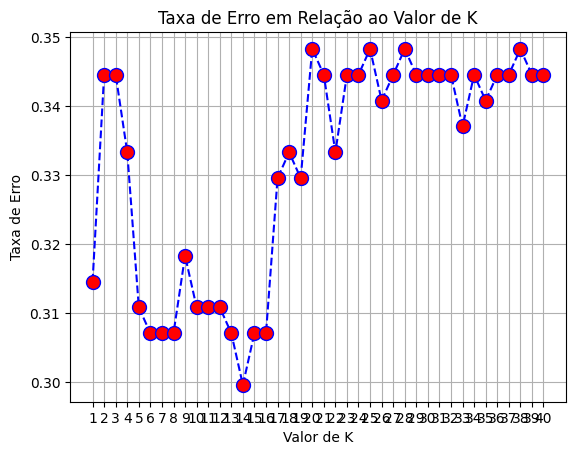

In [ ]:
import matplotlib.pyplot as plt

# Convertendo o dicionário de taxas de erro em listas separadas de valores de K e taxas de erro
k_values = list(taxas_erro.keys())
erro_values = list(taxas_erro.values())

# Plotando o gráfico
plt.plot(k_values, erro_values, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Taxa de Erro em Relação ao Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Taxa de Erro')
plt.xticks(range(1, 41))  # Definindo os valores de K no eixo x de 1 a 40
plt.grid(True)
plt.show()

verificamos que a taxa permanece no range 0.30 - 0.35, para o valor de  K = 14. Será que se eliminarmos colunas com menos correlação poderemos melhorar a precisão do nosso modelo?

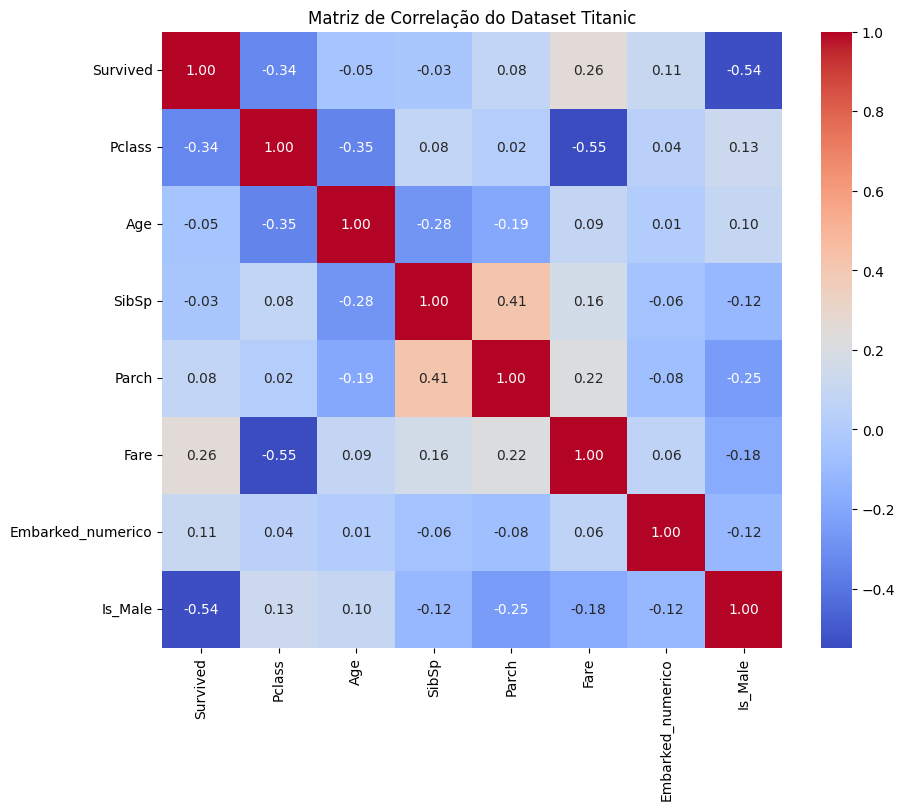

In [ ]:
import seaborn as sns

# Calculando a matriz de correlação
correlation_matrix = titanic.corr()

# Plotando a matriz de correlação usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação do Dataset Titanic')
plt.show()

podemos verificar que algumas colunas apresentam correlação quase insignificante para a coluna survived vamos retirar 'Age', 'SibSp', 'Embarked_numerico', e 'Parch' para tentar uma acuracia melhor

In [ ]:
X_renewed = titanic[['Pclass', 'Fare', 'Is_Male']]

In [ ]:
X_renewed_train, X_renewed_test, y_train, y_test = train_test_split(
    X_renewed, titanic['Survived'], test_size=0.3, random_state=0
)

# Dicionário para armazenar as taxas de erro para cada valor de K
taxas_erro_renewed = {}

for k in valores_k:
    # Criando o classificador KNN com o valor de K atual
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Treinando o classificador com os dados de treinamento
    knn_classifier.fit(X_renewed_train, y_train)

    # Fazendo previsões no conjunto de teste
    y_pred = knn_classifier.predict(X_renewed_test)

    # Calculando a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Calculando a taxa de erro
    erro = 1 - np.sum(np.diag(cm)) / np.sum(cm)

    # Armazenando a taxa de erro no dicionário
    taxas_erro_renewed[k] = erro

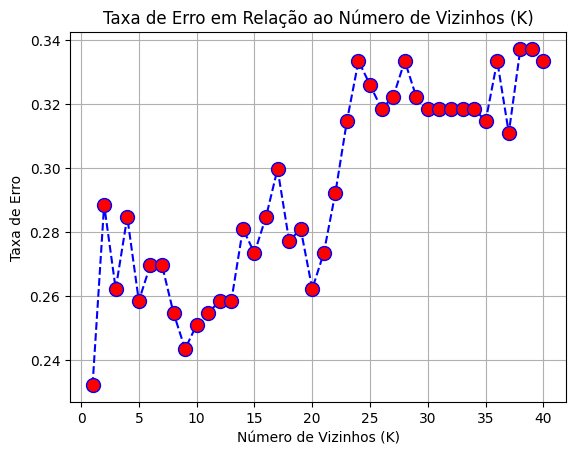

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Lista de valores de K que você deseja testar
valores_k = range(1, 41)

# Dicionário para armazenar as taxas de erro para cada valor de K
taxas_erro = []

for k in valores_k:
    # Criando o classificador KNN com o valor de K atual
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Treinando o classificador com os dados de treinamento
    knn_classifier.fit(X_renewed_train, y_train)

    # Fazendo previsões no conjunto de teste
    y_pred = knn_classifier.predict(X_renewed_test)

    # Calculando a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Calculando a taxa de erro
    erro = 1 - np.sum(np.diag(cm)) / np.sum(cm)

    # Armazenando a taxa de erro na lista
    taxas_erro.append(erro)

# Plotando o gráfico
plt.plot(valores_k, taxas_erro, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Taxa de Erro em Relação ao Número de Vizinhos (K)')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Taxa de Erro')
plt.grid(True)
plt.show()

In [ ]:
# Lista de valores de K que você deseja testar
valores_k = range(1, 41)

# Dicionário para armazenar as taxas de erro para cada valor de K
taxas_erro = {}

for k in valores_k:
    # Criando o classificador KNN com o valor de K atual
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Treinando o classificador com os dados de treinamento
    knn_classifier.fit(X_renewed_train, y_train)

    # Fazendo previsões no conjunto de teste
    y_pred = knn_classifier.predict(X_renewed_test)

    # Calculando a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Calculando a taxa de erro
    erro = 1 - np.sum(np.diag(cm)) / np.sum(cm)

    # Armazenando a taxa de erro no dicionário
    taxas_erro[k] = erro

# Encontrando o valor de K com a menor taxa de erro
melhor_k = min(taxas_erro, key=taxas_erro.get)
melhor_erro = taxas_erro[melhor_k]

# Imprimindo o melhor resultado
print(f"Melhor valor de K: {melhor_k}, Taxa de erro: {melhor_erro}")

Melhor valor de K: 1, Taxa de erro: 0.23220973782771537


*Para dados não parametrizados, a melhor taxa que conseguimos chegar é a mostrada acima, sendo k = 1.*

###Agora, vamos testar com dados parametrizados passados por um Standard scaler e ver a diferença na precisão.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Padronizando os dados
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic)

# Criando um DataFrame com os dados padronizados
titanic_scaled_df = pd.DataFrame(titanic_scaled)

# Dividindo os dados padronizados em conjunto de treinamento e teste
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    titanic_scaled_df,
    titanic['Survived'],
    test_size=0.3,
    random_state=0
)

# Verificando o formato dos conjuntos de treinamento e teste
print("Formato do conjunto de treinamento:", X_train_scaled.shape)
print("Formato do conjunto de teste:", X_test_scaled.shape)

Formato do conjunto de treinamento: (622, 8)
Formato do conjunto de teste: (267, 8)


In [ ]:
from sklearn.metrics import accuracy_score

# Lista para armazenar as precisões para cada valor de K
precisoes = []

# Lista para armazenar as taxas de erro para cada valor de K
error_rate = []

# Lista de valores de K que você deseja testar
valores_k = range(1, 41)

for k in valores_k:
    # Criando o classificador KNN com o valor de K atual
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Treinando o classificador com os dados de treinamento padronizados
    knn_classifier.fit(X_train_scaled, y_train_scaled)

    # Fazendo previsões no conjunto de teste
    y_pred_scaled = knn_classifier.predict(X_test_scaled)

    # Calculando a precisão e armazenando
    precisao = accuracy_score(y_test_scaled, y_pred_scaled)
    precisoes.append(precisao)

    # Calculando a taxa de erro e armazenando
    taxa_erro = np.mean(y_pred_scaled != y_test_scaled)
    error_rate.append(taxa_erro)

# Encontrando o valor de K com a melhor precisão
melhor_k_precisao = max(precisoes)
melhor_k_precisao_idx = precisoes.index(melhor_k_precisao) + 1

# Encontrando o valor de K com a menor taxa de erro
melhor_k_erro = min(error_rate)
melhor_k_erro_idx = error_rate.index(melhor_k_erro) + 1

# Imprimindo todos os resultados
print("Resultados:")
for k, precisao, erro in zip(valores_k, precisoes, error_rate):
    print(f"K: {k}, Precisão: {precisao:.4f}, Taxa de Erro: {erro:.4f}")

print("\nMelhor resultado baseado na precisão:")
print(f"K: {melhor_k_precisao_idx}, Precisão: {melhor_k_precisao:.4f}")

print("\nMelhor resultado baseado na taxa de erro:")
print(f"K: {melhor_k_erro_idx}, Taxa de Erro: {melhor_k_erro:.4f}")

Resultados:
K: 1, Precisão: 0.9963, Taxa de Erro: 0.0037
K: 2, Precisão: 0.9963, Taxa de Erro: 0.0037
K: 3, Precisão: 0.9925, Taxa de Erro: 0.0075
K: 4, Precisão: 0.9963, Taxa de Erro: 0.0037
K: 5, Precisão: 0.9813, Taxa de Erro: 0.0187
K: 6, Precisão: 0.9850, Taxa de Erro: 0.0150
K: 7, Precisão: 0.9850, Taxa de Erro: 0.0150
K: 8, Precisão: 0.9850, Taxa de Erro: 0.0150
K: 9, Precisão: 0.9775, Taxa de Erro: 0.0225
K: 10, Precisão: 0.9850, Taxa de Erro: 0.0150
K: 11, Precisão: 0.9738, Taxa de Erro: 0.0262
K: 12, Precisão: 0.9775, Taxa de Erro: 0.0225
K: 13, Precisão: 0.9775, Taxa de Erro: 0.0225
K: 14, Precisão: 0.9775, Taxa de Erro: 0.0225
K: 15, Precisão: 0.9775, Taxa de Erro: 0.0225
K: 16, Precisão: 0.9775, Taxa de Erro: 0.0225
K: 17, Precisão: 0.9775, Taxa de Erro: 0.0225
K: 18, Precisão: 0.9888, Taxa de Erro: 0.0112
K: 19, Precisão: 0.9850, Taxa de Erro: 0.0150
K: 20, Precisão: 0.9888, Taxa de Erro: 0.0112
K: 21, Precisão: 0.9850, Taxa de Erro: 0.0150
K: 22, Precisão: 0.9813, Taxa d

Text(0, 0.5, 'Taxa de Erro (Error Rate)')

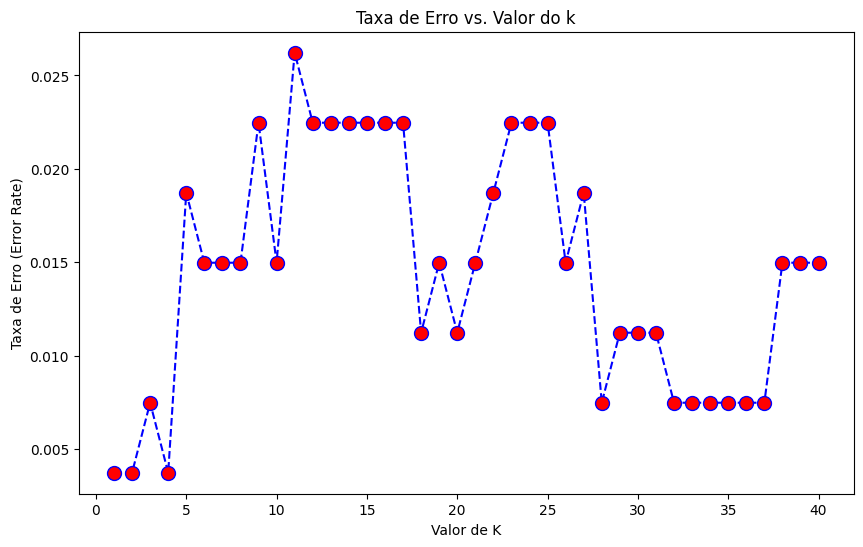

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 41),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Taxa de Erro vs. Valor do k')
plt.xlabel('Valor de K')
plt.ylabel('Taxa de Erro (Error Rate)')

*Podemos perceber que a padronização dos dados melhorou muito a precisão do nosso modelo, vamos ver K que atende o menor erro possivel:*

In [ ]:
from sklearn.metrics import accuracy_score

# Lista para armazenar as precisões para cada valor de K
precisoes = []

for k in valores_k:
    # Criando o classificador KNN com o valor de K atual
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Treinando o classificador com os dados de treinamento
    knn_classifier.fit(X_train_scaled, y_train_scaled)

    # Fazendo previsões no conjunto de teste
    y_pred = knn_classifier.predict(X_test_scaled)

    # Calculando a precisão
    precisao = accuracy_score(y_test_scaled, y_pred)

    # Armazenando a precisão na lista
    precisoes.append(precisao)

# Encontrando o valor de K que produz a melhor precisão
melhor_k = valores_k[np.argmax(precisoes)]
melhor_precisao = max(precisoes)

# Imprimindo o melhor resultado
print(f"Melhor valor de K: {melhor_k}, Precisão: {melhor_precisao}")

Melhor valor de K: 1, Precisão: 0.9962546816479401


## 3) Use o classificador criado em (2) para avaliar o resultado na base de teste. Apresente o resultado do seu melhor classificador indicando os parâmetros do mesmo (valor de k, métrica de distância). Apresente a matriz de confusão para a base de teste para seu melhor classificador.

###**Podemos perceber a a partir dos graficos acima que a parametrização dos nossos dados mesmo não alterando o valor de K (1), eumentou significativamente a precisão do nosso modelo**

**observamos que para o mesmo k = 1, o erro foi de 0.23 para 0.0037 ao parametrizarmos os dados com o Scaler**

### *Será que podemos melhorar ainda mais essa precisão? Vamos utilizar um GridSearch para investigar isso*

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris


# Definindo as características e o alvo
X = X_train_scaled
y = y_train_scaled

# Definir o classificador KNN
knn = KNeighborsClassifier()

# Definir o grid de hiperparâmetros a serem testados
param_grid = {'n_neighbors': list(range(1, 10)),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

# Criar objeto GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Realizar o Grid Search para encontrar os melhores hiperparâmetros
grid_search.fit(X, y)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

# Exibir a melhor pontuação encontrada durante a validação cruzada
print("\nMelhor pontuação durante a validação cruzada:")
print(grid_search.best_score_)


Melhores hiperparâmetros encontrados:
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

Melhor pontuação durante a validação cruzada:
0.9967870967741936


Coclusão:


1.   Estavamos utilizando a distancia euclideana, porem com os dados parametrizados podemos melhorar ainda mais a precisão se usarmos a metrica de distancia de manhattan

*   Substituiremos o parametro Euclidean por Manhattan para a próxima análise.

2.    Estavamos utilizando o peso baseado no inverso da distancia, porem com os dados parametrizados podemos melhorar ainda mais a precisão se usarmos a distancia uniformizada onde todos os vizinhos possuem o mesmo peso.

*   Substituiremos o parametro 'distance por 'uniform' para a próxima análise.

2.    Estavamos utilizando K = 1 e ele permanecerá.

Com isso esperamos que A precisão desse modelo passe de: `0.9963` para `0.9967`.




## Parte 3 - Experimento II - Classificação k-NN com Validação Cruzada

**Pontuação: 35 pontos**

Em nosso segundo experimento, vamos agora aplicar o processo de validação cruzada para poder garantir de fato que temos o melhor modelo possível, utilizando o k-NN!

Volte a prática do Titanic e avalie o seu modelo de acordo com as métricas abordadas na base de testes:

1. Treine novamente um classificador kNN ainda com o melhor valor de k
encontrando anteriormente, porém utilizando validação cruzada com 5 folds. **Exiba os resultados de Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score.**

3. Descubra o melhor valor de k novamente, agora executando várias vezes a validação cruzada com diferentes valores possíveis (mude o número de folds!).Avalie o seu modelo de acordo com as métricas abordadas na base de testes: Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score





###Treine novamente um classificador kNN ainda com o melhor valor de k encontrando anteriormente, porém utilizando validação cruzada com 5 folds. Exiba os resultados de Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score.





In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
# Criar o classificador KNN
knn = KNeighborsClassifier(n_neighbors=1) # para K = 1

y_pred_cv = cross_val_predict(knn, X, y, cv=5)

# Realizar a validação cruzada
scores = cross_val_score(knn, X_train_scaled, y_train_scaled, cv=5)

print("Pontuações de validação cruzada Para K = 1\n")

# Converter as pontuações para o tipo float antes de imprimir
scores_float = [float(score) for score in scores]

# Imprimir as pontuações de validação cruzada
print("Pontuações de validação cruzada:", scores_float)

# Calcular e imprimir a média das pontuações
print("Média das pontuações de validação cruzada:", float(scores.mean()))

# Criar o classificador KNN
knn = KNeighborsClassifier(n_neighbors=2) # para K = 2

# Realizar a validação cruzada
scores = cross_val_score(knn, X_train_scaled, y_train_scaled, cv=5)

print("\nPontuações de validação cruzada Para K = 2\n")


# Converter as pontuações para o tipo float antes de imprimir
scores_float = [float(score) for score in scores]

# Imprimir as pontuações de validação cruzada
print("Pontuações de validação cruzada:", scores_float)

# Calcular e imprimir a média das pontuações
print("Média das pontuações de validação cruzada:", float(scores.mean()))

knn = KNeighborsClassifier(n_neighbors=3) # para K = 3

# Realizar a validação cruzada
scores = cross_val_score(knn, X_train_scaled, y_train_scaled, cv=5)

print("\nPontuações de validação cruzada Para K = 3\n")


# Converter as pontuações para o tipo float antes de imprimir
scores_float = [float(score) for score in scores]

# Imprimir as pontuações de validação cruzada
print("Pontuações de validação cruzada:", scores_float)

# Calcular e imprimir a média das pontuações
print("Média das pontuações de validação cruzada:", float(scores.mean()))

Pontuações de validação cruzada Para K = 1

Pontuações de validação cruzada: [1.0, 1.0, 1.0, 0.9838709677419355, 1.0]
Média das pontuações de validação cruzada: 0.9967741935483871

Pontuações de validação cruzada Para K = 2

Pontuações de validação cruzada: [0.992, 1.0, 0.9919354838709677, 0.967741935483871, 0.9919354838709677]
Média das pontuações de validação cruzada: 0.9887225806451614

Pontuações de validação cruzada Para K = 3

Pontuações de validação cruzada: [1.0, 0.992, 0.9919354838709677, 0.967741935483871, 0.9919354838709677]
Média das pontuações de validação cruzada: 0.9887225806451614


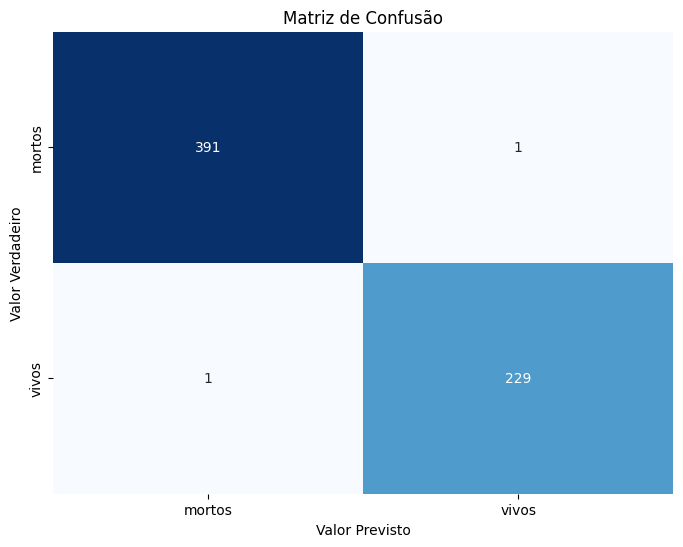

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir os rótulos
labels = ['mortos', 'vivos']

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y, y_pred_cv)

# Plotar o mapa de calor da matriz de confusão com os rótulos
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Verdadeiro')
plt.show()

In [ ]:
# Calcular a precisão
true_positives = conf_matrix[1, 1]  # Verdadeiros positivos
false_positives = conf_matrix[0, 1]  # Falsos positivos

precision = true_positives / (true_positives + false_positives)

# Imprimir a precisão
print(f"Precisão: {precision:.4f}")

Precisão: 0.9957


In [ ]:
# Calcular a cobertura (recall)
true_positives = conf_matrix[1, 1]  # Verdadeiros positivos
false_negatives = conf_matrix[1, 0]  # Falsos negativos

recall = true_positives / (true_positives + false_negatives)

# Imprimir a cobertura
print(f"Cobertura (Recall): {recall:.4f}")

Cobertura (Recall): 0.9957


In [ ]:
# Calcular a acurácia
true_positives = conf_matrix[1, 1]  # Verdadeiros positivos
true_negatives = conf_matrix[0, 0]  # Verdadeiros negativos
total_samples = conf_matrix.sum()  # Soma de todos os valores na matriz de confusão

accuracy = (true_positives + true_negatives) / total_samples

# Imprimir a acurácia
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.9968


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular a precisão
precision = precision_score(y, y_pred_cv)

# Calcular a cobertura (recall)
recall = recall_score(y, y_pred_cv)
# Calcular o F1-score
f1 = f1_score(y, y_pred_cv)

'''O F1-score é a média harmônica da precisão e da cobertura (recall), e é uma medida útil quando você deseja levar em consideração tanto os falsos positivos quanto os falsos negativos. Isso imprimirá o F1-score do seu modelo. '''

# Imprimir o F1-score
print(f"F1-score: {f1:.4f}")

F1-score: 0.9957


###Descubra o melhor valor de k novamente, agora executando várias vezes a validação cruzada com diferentes valores possíveis (mude o número de folds!).Avalie o seu modelo de acordo com as métricas abordadas na base de testes: Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score###

*Vamos verificar quais os melhores parametros para k indo de 1 a 5(após análises previas percebi que o erro começa a se tornar inconstante a partir de K = 7, porém vamos fazer uma busca longa)*

**Check para o melhor valor de:**

*   Matriz Confusão
*   Precisão
*   Cobertura
*   Acurácia
*   F1-Score




In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# Definir os parâmetros a serem testados
param_grid = {'n_neighbors': range(1, 21)}  # Testar k de 1 a 20

# Criar o classificador KNN
knn = KNeighborsClassifier()

# Definir as métricas a serem avaliadas
scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score)}

# Testar com diferentes valores de fold
for num_folds in [3, 5, 6, 7, 10,]:
    print(f"\nValidação Cruzada com {num_folds} folds:")

    # Criar o objeto KFold
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Criar o objeto GridSearchCV
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring=scoring, refit='f1', cv=kf)

    # Executar a busca em grade
    grid_search.fit(X, y)

    # Melhor valor de k encontrado
    best_k = grid_search.best_params_['n_neighbors']
    print("Melhor valor de k encontrado:", best_k)

    # Avaliar o modelo com diferentes métricas
    print("Matriz de Confusão:")
    print(confusion_matrix(y, grid_search.predict(X)))
    print("Precisão:", grid_search.best_score_)
    print("Cobertura:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])
    print("Acurácia:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
    print("F1-score:", grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])



Validação Cruzada com 3 folds:
Melhor valor de k encontrado: 1
Matriz de Confusão:
[[392   0]
 [  0 230]]
Precisão: 0.9886891173167812
Cobertura: 0.9951690821256038
Acurácia: 0.9919562120649078
F1-score: 0.9886891173167812

Validação Cruzada com 5 folds:
Melhor valor de k encontrado: 3
Matriz de Confusão:
[[391   1]
 [  1 229]]
Precisão: 0.987582678199783
Cobertura: 0.9837837837837838
Acurácia: 0.9919483870967742
F1-score: 0.987582678199783

Validação Cruzada com 6 folds:
Melhor valor de k encontrado: 1
Matriz de Confusão:
[[392   0]
 [  0 230]]
Precisão: 0.9886783361683449
Cobertura: 0.9901960784313726
Acurácia: 0.9919716206123974
F1-score: 0.9886783361683449

Validação Cruzada com 7 folds:
Melhor valor de k encontrado: 1
Matriz de Confusão:
[[392   0]
 [  0 230]]
Precisão: 0.9906714327004182
Cobertura: 0.9894179894179894
Acurácia: 0.9935612140668321
F1-score: 0.9906714327004182

Validação Cruzada com 10 folds:
Melhor valor de k encontrado: 1
Matriz de Confusão:
[[392   0]
 [  0 230]

---
***Um fenomeno curioso aconteceu aqui, anteriormente tinhamos percebido que para 5, folds K = 1 apresentava os melhores resultados. Porém, nesse experimento, o modelo está apontando que para essa quantidade de folds, K que melhor satisfaz é 3***


---


***porem K = 1 continua liderando em todos os outros casos de fold***
---

## Parte 4 - Avaliação de Classificadores

Considerando as técnicas k-NN, SVM e Naive Bayes e usando técnicas de Validação Cruzada:

1.   Defina os melhores parâmetros para cade técnica.
2.   Analise as métricas de classificação (Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score) para um classificador baseado.


**Pontuação: 25 pontos**






### Naive Bayes

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import pandas as pd

# 1. Carregar o conjunto de dados "titanic"


# 2. Pré-processar os dados, se necessário
# (Você pode lidar com valores ausentes, codificar variáveis categóricas, etc.)

# 3. Dividir o conjunto de dados em características (X) e rótulos (y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# 4. Criar um classificador Naive Bayes
naive_bayes = GaussianNB()

# 5. Definir uma grade de parâmetros para o classificador Naive Bayes
param_grid = {}

# 6. Usar o GridSearchCV para encontrar os melhores parâmetros através de validação cruzada
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# 7. Treinar o modelo com os melhores parâmetros encontrados
best_naive_bayes = grid_search.best_estimator_

# 8. Avaliar o desempenho do modelo com métricas relevantes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = best_naive_bayes.predict(X_test)
report = classification_report(y_test, y_pred)

# 9. Gerar um relatório dos melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("\nRelatório de classificação:")
print(report)

Melhores parâmetros encontrados:
{}

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       109
           1       0.71      0.74      0.72        69

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Dividir o conjunto de dados em treino e teste com aleatoriedade padrão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state )

# Criar o classificador Naive Bayes
naive_bayes = GaussianNB()

# Treinar o modelo com os dados de treino
naive_bayes.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = naive_bayes.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisão do modelo:", accuracy)

Precisão do modelo: 0.7865168539325843


### SVM

In [ ]:
##

### k-NN

In [ ]:
###